# Programming for Data Analysis Assignment

In [1]:
import numpy as np
rng = np.random.default_rng()
rng.integers(10,25)

13

In [2]:
rng = np.random.default_rng()
rng.integers(100, size=10)

array([74, 79, 91, 10, 43, 89, 16, 23, 68, 84], dtype=int64)

In [3]:
rng = np.random.default_rng()
rng.integers(50,100, size=10)

array([68, 59, 67, 95, 91, 59, 55, 70, 60, 89], dtype=int64)

In [4]:
rng = np.random.default_rng()
rng.integers(100, size=(2,4))

array([[86, 26,  2, 22],
       [56, 16, 70,  2]], dtype=int64)

In [5]:
rng = np.random.default_rng()
rng.random()

0.20769492287700453

In [6]:
rng = np.random.default_rng()
rng.random(5)

array([0.76366035, 0.17413864, 0.20534655, 0.72944558, 0.33198325])

In [7]:
rng = np.random.default_rng()
rng.random((5,4))

array([[0.98256344, 0.62333313, 0.75311639, 0.62709758],
       [0.96829461, 0.81219567, 0.96143691, 0.19306358],
       [0.05655568, 0.91385342, 0.45410954, 0.24485059],
       [0.62523691, 0.18847927, 0.00256739, 0.73239577],
       [0.20226597, 0.85445839, 0.6420604 , 0.90104275]])

In [8]:
rng = np.random.default_rng()
x = rng.random(1000000)

(array([ 99808.,  99380., 100199.,  99831.,  99777., 100573., 100031.,
         99894., 100199., 100308.]),
 array([4.68122190e-07, 1.00000421e-01, 2.00000373e-01, 3.00000326e-01,
        4.00000279e-01, 5.00000231e-01, 6.00000184e-01, 7.00000137e-01,
        8.00000089e-01, 9.00000042e-01, 9.99999994e-01]),
 <BarContainer object of 10 artists>)

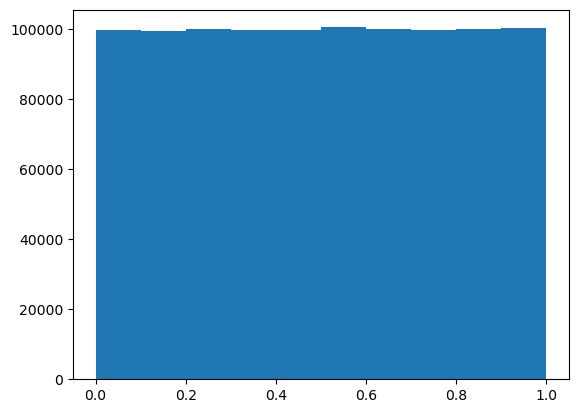

In [9]:
import matplotlib.pyplot as plt
plt.hist(x)


(array([  7.,  24.,  91., 160., 266., 218., 154.,  56.,  19.,   5.]),
 array([-0.3132085 , -0.24816396, -0.18311942, -0.11807487, -0.05303033,
         0.01201421,  0.07705875,  0.1421033 ,  0.20714784,  0.27219238,
         0.33723693]),
 <BarContainer object of 10 artists>)

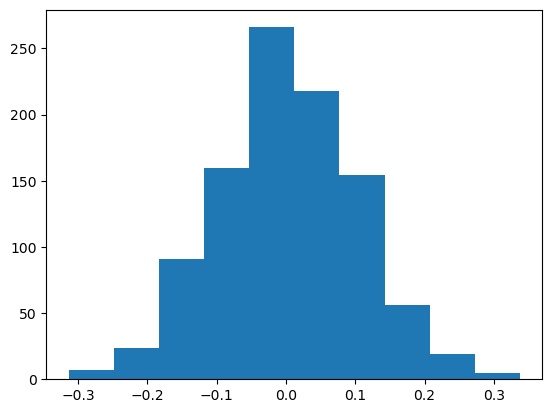

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 1000)
plt.hist(s)

(array([  26.,  157.,  706., 1920., 2935., 2468., 1297.,  410.,   70.,
          11.]),
 array([-3.5706218 , -2.82378007, -2.07693834, -1.33009661, -0.58325488,
         0.16358685,  0.91042858,  1.65727032,  2.40411205,  3.15095378,
         3.89779551]),
 <BarContainer object of 10 artists>)

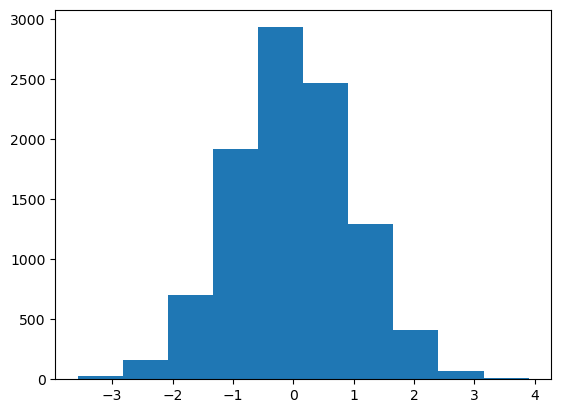

In [11]:
y = np.random.normal(0.0,1.0,10000)
plt.hist(y)